Loading Mel-Spectrograms:   0%|          | 0/10 [00:00<?, ?it/s]

Loading Mel-Spectrograms: 100%|██████████| 10/10 [00:03<00:00,  2.53it/s]


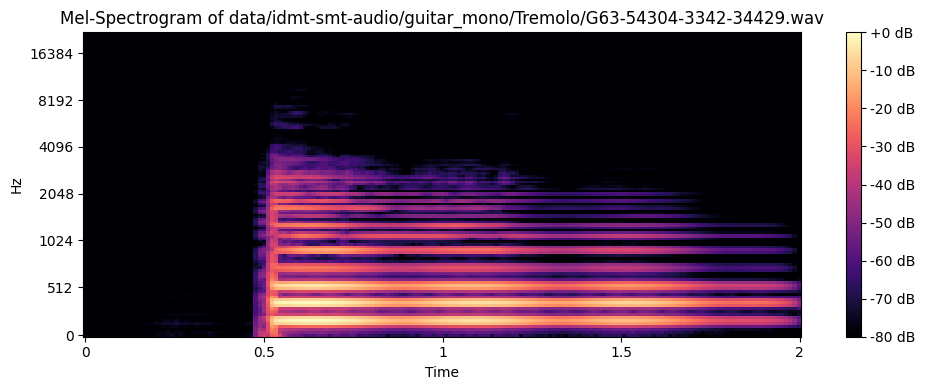

In [7]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from tqdm import tqdm

# === CONFIGURATION ===
# audio_dir = "your_audio_folder"           # Replace with your actual path
metadata_path = "data/metadata.csv"            # Metadata file
sample_rate = 44100
duration = 2.0                            # Duration in seconds
max_len = int(sample_rate * duration)
n_mels = 128

# === LOAD METADATA ===
metadata = pd.read_csv(metadata_path)

# === PROCESS MULTIPLE FILES ===
spectrograms = []
file_list = metadata['filename'].tolist()[:10]  # Limit to 10 files for preview

for filename in tqdm(file_list, desc="Loading Mel-Spectrograms"):
    file_path = filename
    if not os.path.exists(file_path):
        print(f"File not found: {filename}")
        continue

    try:
        y, sr = librosa.load(file_path, sr=sample_rate, mono=True)

        # Pad or trim
        if len(y) < max_len:
            y = np.pad(y, (0, max_len - len(y)))
        else:
            y = y[:max_len]

        # Compute Mel-spectrogram
        mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
        mel_db = librosa.power_to_db(mel, ref=np.max)
        spectrograms.append((filename, mel_db))

    except Exception as e:
        print(f"Error processing {filename}: {e}")

# === DISPLAY FIRST SPECTROGRAM ===
if spectrograms:
    example_name, example_mel = spectrograms[0]
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(example_mel, sr=sample_rate, x_axis='time', y_axis='mel', cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel-Spectrogram of {example_name}')
    plt.tight_layout()
    plt.show()
else:
    print("No valid spectrograms to display.")


In [11]:
import pandas as pd

# Convert spectrograms list into a DataFrame
records = []
for filename, mel in spectrograms:
    flat_mel = mel.flatten()
    record = {'filename': filename, **{f'mel_{i}': val for i, val in enumerate(flat_mel)}}
    records.append(record)

# Create DataFrame
df = pd.DataFrame(records)

# Save to CSV
df.to_csv("mel_dataset.csv", index=False)
print("Saved mel-spectrograms to mel_dataset.csv")


Saved mel-spectrograms to mel_dataset.csv


In [ ]:
# Load the saved CSV
df = pd.read_csv("mel_dataset.csv")

# Pick one spectrogram row
filename = df.loc[0, 'filename']
flat_mel = df.loc[0].drop('filename').values.astype(np.float32)
mel_shape = (128, -1)  # 128 mel bands, time steps inferred
mel_spectrogram = flat_mel.reshape(mel_shape)

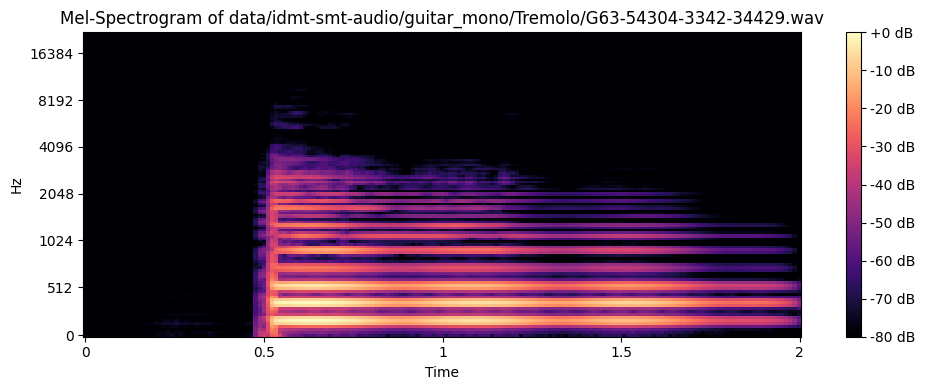

In [13]:
# === DISPLAY FIRST SPECTROGRAM ===
if spectrograms:
    example_name, example_mel = spectrograms[0]
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(example_mel, sr=sample_rate, x_axis='time', y_axis='mel', cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel-Spectrogram of {example_name}')
    plt.tight_layout()
    plt.show()
else:
    print("No valid spectrograms to display.")